In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def dynamic_expansion(i):
    i_min = i.min()
    i_max = i.max()

    new_im = np.zeros(i.shape, dtype=np.uint8)

    for x in range(i.shape[0]):
        for y in range(i.shape[1]):
            val = (i[x, y] - i_min) / (i_max - i_min) * 255
            new_im[x, y] = int(val)
    
    return new_im

In [18]:
def histogram_equalisation(im):
    # Calculate histogram
    hist, _ = np.histogram(im.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function
    HC = np.zeros(256)
    HC[0] = hist[0]
    for i in range(1, 256):
        HC[i] = HC[i-1] + hist[i]

    new_im = np.zeros(im.shape, dtype=np.uint8)

    w, h = im.shape[:2]
    for x in range(w):
        for y in range(h):
            val = HC[im[x, y]] / (w * h) * 255
            new_im[x, y] = int(val)

    return new_im

In [19]:
_load = lambda str: plt.imread('../res/' + str)

def plot_im_and_hist(img):
    _to_rgb = lambda img: np.dstack((img, img, img))

    def plot(im, title, id):
        plt.subplot(2, 3, id)
        plt.imshow(_to_rgb(im))
        plt.title(title)
        plt.subplot(2, 3, id+3)
        plt.hist(im.ravel(), 256, [0, 256])

    plot(img, 'Originale', 1)
    plot(dynamic_expansion(img), 'Expansion dynamique', 2)
    plot(histogram_equalisation(img), 'Egalisation d\'histogramme', 3)

    plt.tight_layout()
    plt.show()

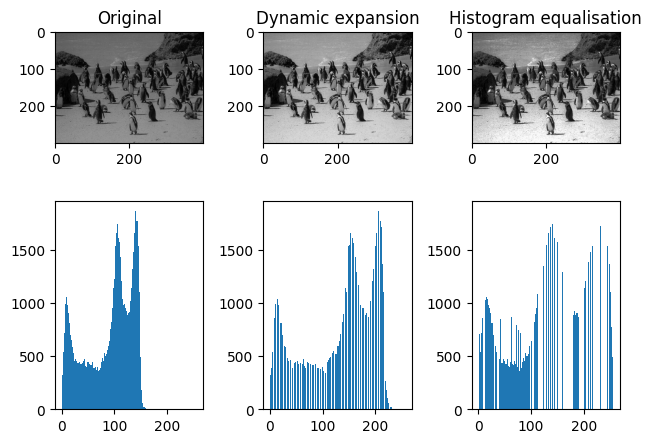

In [20]:
im_01 = _load("TP02-01.jpg")
plot_im_and_hist(im_01)

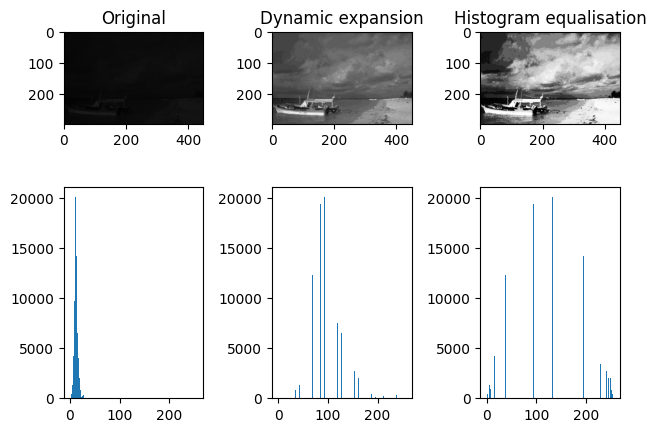

In [21]:
im_02 = _load("TP02-02.bmp")
plot_im_and_hist(im_02)

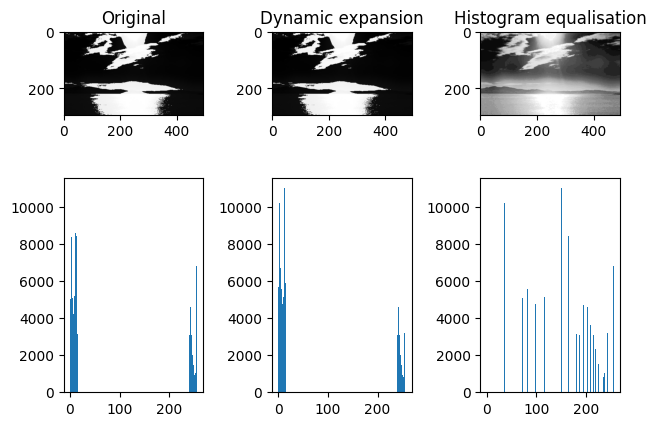

In [22]:
im_03 = _load("TP02-03.bmp")
plot_im_and_hist(im_03)